# Math 638 Homework 7
Geneva Porter, 8 May 2019

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
from IPython.display import display, Math, Latex
import scipy.integrate as integrate
from IPython.display import display, Math
%matplotlib inline


**Problem 1**) (10 pts) Using the code for the two-stage RK scheme provided in the notes, implement the 4-stage RK scheme using the method described in the textbook. (5pts)  Test your method on the problem

$$
\dot{x} = x(1-x), ~ x(0) = \frac{1}{2}.
$$

Do you get an error that goes like $(\delta t)^{4}$? (5pts)  Note, to answer this, pick a reference time, like $t_{f}=2$.  Derive an exact solution, $x(t)$, and then compare $x(t_{f})$ to $x^{(RK)}(t_{f})$ where $x^{(RF)}(t_{f})$ is the approximation generated by the RK scheme.  If our theory is correct, then we should have 

$$
\left|x(t_{f}) -  x^{(RK)}(t_{f})\right| \approx C (\delta t)^4
$$

or 

$$
\log_{10}\left|x(t_{f}) -  x^{(RK)}(t_{f})\right| \approx \log_{10}C  + 4 \log_{10}(\delta t)
$$

so that if we made an array of $\delta t$ values, like 

`
dtvals = np.array([1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4])
`

and then ran the RK scheme over each time step and kept track of the error in an array, and then plotted the array against the `dtvals` on a log/log plot, we should see a line of slope 4 appear.  See also problem 2.8.3/2.8.4 for further reference.  

## Problem 1

We are given

$$
\dot{x} = x(1-x), ~ x(0) = \frac{1}{2}.
$$

The 4-stage RK scheme described by Strogatz on pages 33-34 uses the following formula to approximate $x(t)$:

$$ \begin{align}
   x_{n+1} = & x_n+\frac{1}{6}(k_1+2k_2+2k_3+k_4) ~~~\text{with}\\
   & k_1 = f(x_n)\Delta{t}\\ 
   & k_2 = f(x_n + \frac{1}{2}k_1)\Delta{t}\\ 
   & k_3 = f(x_n + \frac{1}{2}k_2)\Delta{t}\\ 
   & k_4 = f(x_n + k_3)\Delta{t}\\ 
\end{align} $$

Here, $f(x_n)=x_n(1-x_n)$. The analytical solution can readily be found:

$$ \frac{dx}{dt}=x(1-x) ~~~\longrightarrow~~~ 
\int\frac{dx}{x(1-x)}=\int dt  ~~~\longrightarrow~~~\\
ln(x)-ln(1-x)=t+C ~~~\longrightarrow~~~  
x(t) = \frac{Ae^t}{1+Ae^t} \\
\text{and} ~~~ x(0)=\frac{e^t}{1+e^t}=\frac{1}{2} ~~~
\longrightarrow ~~~ x(t)=\frac{e^t}{1+e^t}$$

The code for the numerical approach using a 4-stage Runge-Kutta scheme is shown below.

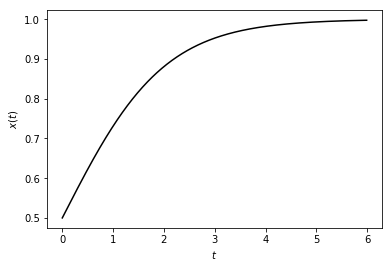

In [33]:
# Defining dx/dt=f(x)
def f(x):
    return x*(1.-x)

# Defining the 4-stage RK scheme
def rk4(f,xj,dt):
    k1 = f(xj)
    k2 = f(xj+0.5*k1*dt)  
    k3 = f(xj+0.5*k2*dt)
    k4 = f(xj+k3*dt)
    return xj + dt/6.*(k1+2.*k2+2.*k3+k4)

# Defining the analytical solution
def tsol(t):
    return np.exp(t)/(np.exp(t)+1)

# Uses the RK scheme to numerically approximate the 
# solution to dx/dt=f given the initial condition 
# x0, final time tf, and timestep dt. It then plots 
# the result along with the analytical solution.
def ode_solver(f,x0,tf,dt):
    nstep = int(np.round(tf/dt))
    nsol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    nsol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        tvals[jj] = tj+dt
        nsol[jj] = rk4(f,nsol[jj-1],dt)
    plt.plot(tvals,nsol,color='k',ls='-')
    #plt.plot(tvals,tsol(tvals),color='r',ls='--')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')

# Output
ode_solver(f,.5,6,1e-2)

Our code correctly exhibits the dynamics of this system, which has an unstable fixed point at $x(t)=0$ and a stable fixed point at $x(t)=1$. With $\Delta{t}=10^{-2}$, we should get an error on the order of $(\Delta{t})^4$. To test this, we will create a plot that maps the log of the difference between the analytical and numerical solution at $x(2)$. 

<IPython.core.display.Math object>

4.062456888367895


<IPython.core.display.Math object>

[1.11022302e-16 1.11022302e-16 1.44328993e-15 2.63011835e-13
 4.21562785e-12 2.67413813e-09 4.35892313e-08 5.85882393e-04]


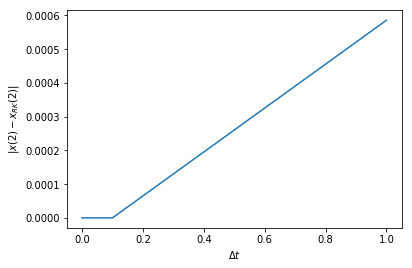

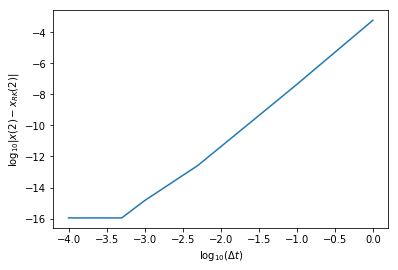

In [34]:
# Returns the numerical approximation of dx/dt=f at 
# designated time tf, given initial caondition x0 
# and timestep dt. 
def approx(f,x0,tf,dt):    
    nstep = int(np.round(tf/dt))+1
    nsol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    nsol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        tvals[jj] = tj+dt
        nsol[jj] = rk4(f,nsol[jj-1],dt)
    return nsol[jj]

# Calculates the error between the numerical and analytical 
# solution dx/dt=f at time tf for various time step values, 
# given initial value x0.
def error(f,x0,tf):
    dtvals = np.array([1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 1])
    ref = len(dtvals)
    Er = np.zeros(ref)
    nvals = np.zeros(ref)
    for ii in xrange(ref):
        dt = dtvals[ii]
        nvals[ii] = approx(f,x0,tf,dt)
        Er[ii] = (np.abs(nvals[ii]-tsol(tf)))
    logE = np.log10(Er)
    logD = np.log10(dtvals)
    slope = (logE[3]-logE[ref-1])/(logD[3]-logD[ref-1])
    display(Math(r'\text{Slope for } \Delta{t}>10^{-3}:'))
    print slope
    display(Math(r'\text{Error values:}'))
    print Er
    plt.plot(dtvals,Er)
    plt.xlabel('$\Delta{t}$')
    plt.ylabel('$|x(2)-x_{RK}(2)|$')
    plt.show()
    plt.plot(logD,logE)
    plt.xlabel('$\log_{10}(\Delta{t})$')
    plt.ylabel('$\log_{10}|x(2)-x_{RK}(2)|$')
    
    
# Output
error(f,0.5,2)

While we expect the logarithmic graph to have a slope of 4 everywhere, this behavior is not reflected in very small values of $\Delta{t}$ due to Python's limited precision of floating point numbers. Note that when $\Delta{t}=10^{-4}$ and $\Delta{t}=5\times 10^{-4}$, we get the same error values (to the 16th decimal place). 

**Problem 2**) (5 pts) 7.3.9

#### Part a

To approximate the shape $r(\theta)$ of the orbit for $\mu$<<1, assume a power series solution of the form $r(\theta)=1+\mu{r_1}(\theta)+\mathcal{O}(\mu^2)$. Substitute the series into a differential equation for $dr/d\theta$. Neglect all $\mathcal(\mu^2)$ terms, and thereby derive a simple differential equation for $r_1(\theta)$. Solve this equation explicitly for $r_1(\theta)$.

We are given $$ r(\theta) = 1+\mu r_1(\theta) $$

So then $$ \frac{dr(\theta)}{d\theta} = \mu \frac{dr_1(\theta)}{d\theta} $$

We have already examined the system:

$$ \dot{r} = r(1-r^2)+\mu{r}\cos(\theta) \\
\dot{\theta} = 1 $$

and we can quickly find that 
$$ \dot{r} = \frac{dr}{d\theta}\cdot\frac{d\theta}{dt} = \frac{dr}{d\theta}$$

If we replace $r$ with $r(\theta)$, we get:

$$ \dot{r} = \frac{dr(\theta)}{d\theta} = \mu\frac{dr_1(\theta)}{d\theta} \\ \text{and} ~~~~~ r = 1+\mu r_1(\theta) $$

Now we can say that 

$$ \mu\frac{dr_1(\theta)}{d\theta} = (1+\mu r_1(\theta))(1-(1+\mu r_1(\theta))^2)+\mu(1+\mu r_1(\theta))\cos(\theta) 
\\ = 1+\mu r_1(\theta)-(1+\mu r_1(\theta))^3+\mu\cos\theta+\mu^2r_1(\theta)\cos(\theta)
\\ = -2\mu r_1(\theta)+\mu \cos\theta+\mathcal{O}(\mu^2)$$ 

We can neglect the higher order terms and then say that:

$$ \frac{dr_1(\theta)}{d\theta} = -2r_1(\theta)+\cos\theta $$

Which is our simple differential equation for $r_1(\theta)$. Using the integrating term $e^{2\theta}$, we have:

$$ \frac{d}{d\theta}\left(e^{2\theta}r_1(\theta)\right) = \cos\theta e^{2\theta} ~~~~~\longrightarrow~~~~~ r_1(\theta) = ^{-2\theta}\int\cos\theta e^{2\theta}d\theta $$

 Using integration by parts twice, we have:

$$ r_1(\theta) = \frac{1}{5}\sin\theta+\frac{2}{5}\cos\theta+Ce^{-2\theta} $$



#### Part b

Find the maximum and minimum $r$ on your approximate orbit, and hence show that it lies in the annulus $\sqrt{1-\mu}<r<\sqrt{1+\mu}$, as expected.


Substituting our result for $r_1(\theta)$ back into our original equation, we get:

$$ r(\theta) = 1+\mu \left[\frac{1}{5}\sin\theta+\frac{2}{5}\cos\theta+Ce^{-2\theta}\right] $$

 We want to find the critical points to determine maximum and minimum values of $r$. 
 
 $$ \frac{dr(\theta)}{d\theta} = \mu\left[\frac{1}{5}\cos\theta-\frac{2}{5}\sin\theta+Ce^{-2\theta}\right] = 0 $$
 
 Since $C$ is unknown and is very small for large $\theta$, we can just consider the periodic trajectory. This give us solutions:

$$ \tan{\theta} = \frac{1}{2} ~~~~~\longrightarrow~~~~~ \theta = \tan^{-1}\left(\frac{1}{2}\right) $$

Plugging in this result and using a simple triangle substitution, we get:

$$r(\theta^*) = 1+\mu \left[\frac{1}{5\sqrt{5}}+\frac{4}{5\sqrt{5}}\right] = 1+\frac{\mu}{\sqrt{5}} $$

Which is the solution in the first quadrant. In the third quadrant we have:

$$ \theta = \tan^{-1}\left(\frac{-1}{-2}\right) ~~~~~\longrightarrow $$

$$r(\theta^*) = 1+\mu \left[\frac{-1}{5\sqrt{5}}-\frac{4}{5\sqrt{5}}\right] = 1-\frac{\mu}{\sqrt{5}} $$

Therefore, we have an orbit that lies inside

$$ 1-\frac{\mu}{\sqrt{5}}<r<1+\frac{\mu}{\sqrt{5}}$$

which is within the annulus $\sqrt{1-\mu}<r<\sqrt{1+\mu}$.

#### Part c

Use a computer to calculate $r(\theta)$ numerically for various small $\mu$, and plot the results on the same graph as your analytical approximation for $r(\theta)$. How does the maximum error depend on $\mu$?

Below are 3 plot for the analytic approximation (black dotted line) and the numeric approximation (red line) for varying values of $0<\mu<1$. Clearly, larger values of $\mu$ result in larger errors.

<IPython.core.display.Math object>

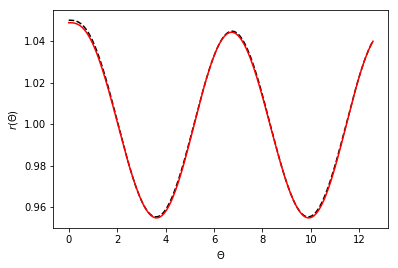

<IPython.core.display.Math object>

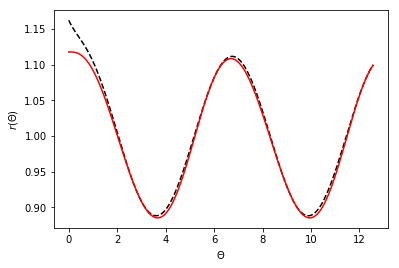

<IPython.core.display.Math object>

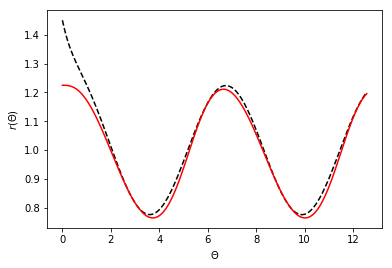

<IPython.core.display.Math object>

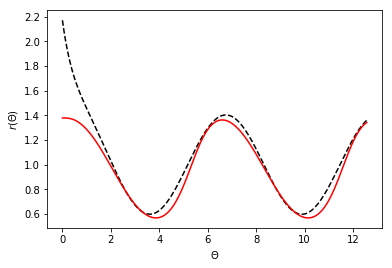

In [56]:
Pi = np.pi
mu = [.1,.25,.5,.9]
theta_vals = np.linspace(0*Pi,4*Pi,200)

for u in mu:
    
    min = np.sqrt(1.-u)
    max = np.sqrt(1.+u)
    
    def dr_dtheta(r,theta):
        return r*(1-r**2.)+u*r*np.cos(theta)
    
    r_analytic = 1+u*(1./5.*np.sin(theta_vals)+2./5.*np.cos(theta_vals))+u**2*np.exp(-2.*theta_vals)
    r_numeric = integrate.odeint(dr_dtheta,max,theta_vals)
    
    plt.plot(theta_vals,r_analytic,'--k')
    plt.plot(theta_vals,r_numeric,'r')
    display(Math("\mu=%r" % u))
    plt.xlabel('$\Theta$')
    plt.ylabel('$r(\Theta)$')
    plt.show()
    


### Problem 6 
(10 pts) For two-dimensional reversible systems, or at least those that are reversible under the $(x,y)\rightarrow (x,-y)$ transformation, whose linearization are given by a harmonic oscillator, we showed that a polar coordinates transformation leads us to the leading order system

\begin{align*}
\dot{r} = & r^{2}f(\theta)\\
\dot{\theta} = & -1 + rg(\theta), 
\end{align*}

where we have the symmetries

$$
f(-\theta) = -f(\theta), ~ g(-\theta) = g(\theta).
$$

The periodicity of $f$ and $g$ imply that we have the Fourier series representations 

$$
f(\theta) = \sum_{m=-\infty}^{\infty}\hat{f}_{m}e^{im\theta}, ~~ g(\theta) = \sum_{m=-\infty}^{\infty}\hat{g}_{m}e^{im\theta}
$$

where 

$$
\hat{f}_{m} = \frac{1}{2\pi}\int_{0}^{2\pi}e^{-im\theta}f(\theta)d\theta, ~~ \hat{g}_{m} = \frac{1}{2\pi}\int_{0}^{2\pi}e^{-im\theta}g(\theta)d\theta
$$

and where we assume both $f$ and $g$ are real functions so that $\hat{f}_{-m} = \hat{f}^{\ast}_{m}$ and $\hat{g}_{-m} = \hat{g}^{\ast}_{m}$ where $\ast$ denotes complex-conjugation.  

#### Part 1

* Show that the odd symmetry in $f$ implies that $\hat{f}_0=0$

$$ \hat{f}_0 =\frac{1}{2\pi}\int_0^{2\pi}f(\theta)d\theta = \frac{1}{2\pi}[F(2\pi)-F(0)]$$

#### Solution:

Since $f$ has odd symmetry, $f(0)=0$. Also, any oscillating function of $\theta$ must have the property that $f(\theta)$ = $f(\theta+2\pi)$. Therefore, 

$$ f(2\pi)=f(0) \longrightarrow F(2\pi)=F(0) \longrightarrow F(2\pi)-F(0)=0$$

So $\hat{f}_0=0$

#### Part 2

* Show that 
$$
r(t) = \frac{r_{0}}{1-r_{0}\int_{0}^{t}f(\theta(s))ds}
$$

#### Solution:

$$ \frac{dr}{dt}=r^2\cdot f[\theta(t)] ~~~\longrightarrow~~~ \frac{dr}{r^2}=f[\theta(t)]dt ~~~\longrightarrow~~~ \\
\int_0^t\frac{dr}{r(s)^2} = \int_0^t f[\theta(s)]ds ~~~\longrightarrow~~~ -\left.\frac{1}{r(s)}\right|_0^t = \int_0^t f[\theta(s)]ds \\
\frac{1}{r(0)}-\frac{1}{r(t)}=\int_0^t f[\theta(s)]ds ~~~\longrightarrow~~~ r(t)=\frac{1}{\frac{1}{r_0}-\int_0^t f[\theta(s)]ds} \\
~~~\longrightarrow~~~ r(t)=\frac{r_0}{1-r_0\int_0^t f[\theta(s)]ds} $$

#### Part 3

* Show that if you let $\theta(t) = -t + \theta_{0} + r_{0}\tilde{\theta}$, then one has 

$$
\dot{\tilde{\theta}} = \frac{g\left(-t+\theta_{0}+r_{0}\tilde{\theta}(t)\right)}{1-r_{0}\int_{0}^{t}f(-s-\theta_{0}+r_{0}\tilde{\theta}(s))ds}
$$

#### Solution:

$$ \theta(t) = -t + \theta_{0} + r_{0}\tilde{\theta} ~~~\longrightarrow ~~~ \frac{d\theta}{dt}=-1+r_0\frac{d\tilde{\theta}}{dt} ~~~\longrightarrow ~~~ \frac{d\tilde{\theta}}{dt} = \frac{\dot{\theta}+1}{r_0} $$

Substituting for $\dot{\theta}$ and the $r(t)$ we found earlier,

$$ \begin{align}
\dot{\tilde{\theta}}&=\frac{-1+rg(\theta)+1}{r_0} \\
    &=\frac{rg(\theta)}{r_0} \\
    &=\frac{r_0}{1-r_0\int_0^t f[\theta(s)]ds}\cdot\frac{g(\theta)}{r_0}\\
    &=\frac{g(\theta)}{1-r_0\int_0^t f[\theta(s)]ds}\\
    &=\frac{g(-t + \theta_{0} + r_{0}\tilde{\theta}(t))}{1-r_0\int_0^t f[-s + \theta_{0} + r_{0}\tilde{\theta}(s)]ds}
    \end{align} $$

#### Part 4 (not attempted)

* If we start on the x-axis, so that $\theta_{0}=0$, using series arguments, how small should you choose your initial radius $r(0)=r_{0}$ to ensure that $r(t)$ remains bounded up to the point it strikes the other side of the x-axis, i.e. when $\theta(t)=\pi$?  To provide a reasonable, though albeit hand-wavy, argument, you will need to think about the dynamics associated with the approximation
$$
\dot{\tilde{\theta}} \sim g\left(-t \right)
$$
and what that means about the behavior of the integral 
$$
\int_{0}^{t}f\left(-s - r_{0}\tilde{\theta}(s) \right) ds \sim \int_{0}^{t}f\left(-(1 + r_{0}\hat{g}_{0})s - r_{0}G(s) \right) ds
$$
where
$$
G(t) = -\sum_{m\neq 0}\frac{\hat{g}_{m}}{im}\left(e^{-imt} -1 \right).
$$

**Total**: Let's call it 25/45